In [3]:
# Import packages
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import copy

import numpy as np

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
filter_path = '/Users/jiaxuanli/Research/HSC_Dragonfly_DECaLS/Filters/'

In [5]:
from sedpy import observate
hsc = {
    'name': 'HSC',
    'filters':
    observate.load_filters(['hsc_g', 'hsc_r2', 'hsc_i2'],
                           directory=f"{filter_path}/hsc_responses_all_rev3/")
}

decals = {
    'name': 'DES',
    'filters':
    observate.load_filters(['des_g', 'des_r', 'des_z'],
                           directory=f"{filter_path}/decals_responses/")
}

sdss = {
    'name': 'SDSS',
    'filters':
    observate.load_filters(['sdss_g0', 'sdss_r0', 'sdss_i0'])
}
#filter_dragonfly = observate.load_filters(['dragonfly_g', 'dragonfly_r'], directory="./dragonfly_responses/")

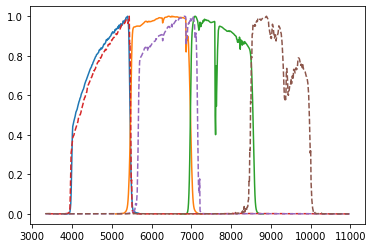

In [6]:
for i, filt in enumerate(hsc['filters']):
    plt.plot(filt.wavelength, filt.transmission / max(filt.transmission), 
             label=list('gri')[i], linestyle='-')
    
for i, filt in enumerate(decals['filters']):
    plt.plot(filt.wavelength, filt.transmission / max(filt.transmission),
             label=list('grz')[i], linestyle='--')

### Import Gunn-Stryker spectrums

In [7]:
spec_cat = Table.read(f'{filter_path}/GunnStryker/gsspectype.ascii', format='ascii.no_header')

Text(0.5, 0, '$\\lambda/\\mathrm{\\AA}$')

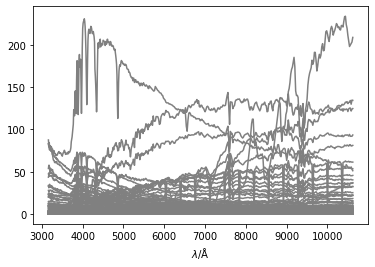

In [8]:
fig, ax = plt.subplots()    
for obj in spec_cat:
    filename = obj['col1'].rstrip('.tab') + '.ascii'
    spec = Table.read(f'{filter_path}/GunnStryker/' + filename, format='ascii')
    ax.plot(spec['col1'], spec['col2'], color='gray')
    
ax.set_xlabel(r'$\lambda/\mathrm{\AA}$')
#ax.set_ylabel()

### Plot filter corretion relations

In [21]:
from kuaizi.utils import filter_corr_gunn_stryker

Calculating synthetic magnitudes based on Gunn-Stryker catalog
Deriving the filter correction between HSC and DES in 2 bands: ['g' 'r']


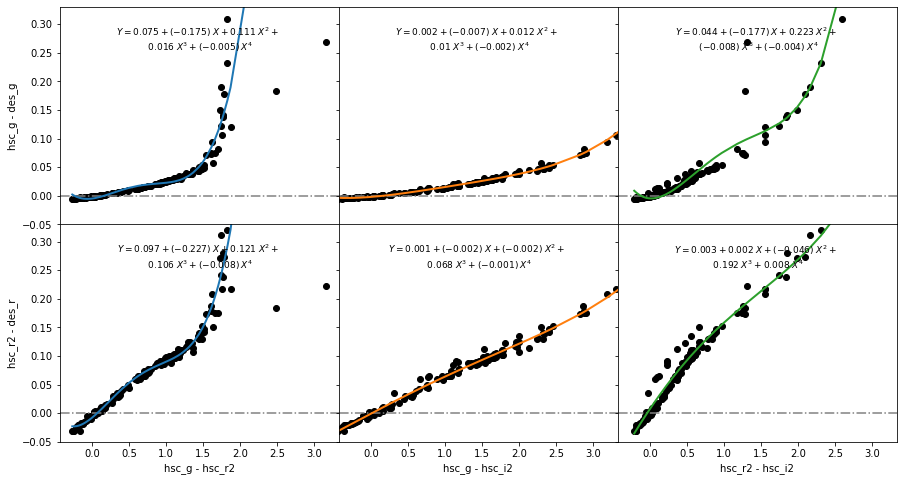

In [24]:
surveys = filter_corr_gunn_stryker([hsc, decals],
                                   n_terms=4,
                                   x_upper_lims=[1.8, 4, 4],
                                   y_lim=[-0.05, 0.33],
                                   skip_calc_mag=False)

Calculating synthetic magnitudes based on Gunn-Stryker catalog
Deriving the filter correction between DES and HSC in 2 bands: ['g' 'r']


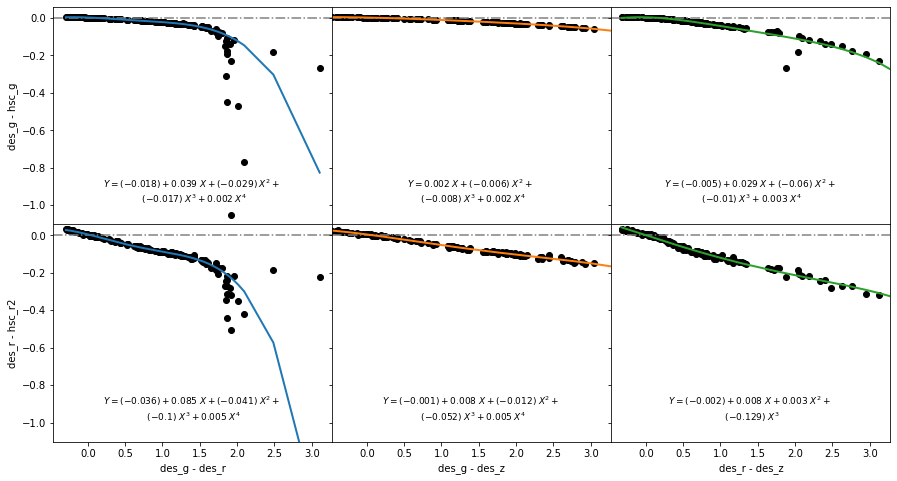

In [22]:
surveys = filter_corr_gunn_stryker(
    [decals, hsc],  # change the order of two surveys
    n_terms=4,
    x_upper_lims=[1.8, 4, 4],
    skip_calc_mag=True)

In [348]:
func = np.poly1d([0., 0.002, -0.006, -0.008, 0.002])

In [350]:
func(1.3)

-0.014146

### Then you can open a catalog and calculate filter corrections based on their color